# Librerías

In [1]:
import pandas as pd
import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import BaggingClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import classification_report
# from sklearn.metrics import roc_auc_score
# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import RandomOverSampler
# from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
# import json

# Datos

In [2]:
df = pd.read_csv('../../Data/IPS_Atencion_Capacidad_Transformed.csv')

In [3]:
df

,codigo_sede,num nivel atencion,naturaleza,Ambulancias-Básica,Ambulancias-Medicalizada,Camas-Adultos,Camas-Atención del Parto,Camas-Cuidado Agudo Mental,Camas-Cuidado Intensivo Adulto,Camas-Cuidado Intensivo Neonatal,...,Salas-Procedimientos,Salas-Quirófano,Salas-Sala de Cirugía,Salas-Sala de Radioterapia,Sillas-Otras patologías,Sillas-SPA,Sillas-Salud Mental,Sillas-Sillas de Hemodiálisis,Sillas-Sillas de Quimioterapia,Unidad movil-Unidad Móvil
0,50010001201,NaN,Privada,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,50010016401,NaN,Privada,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
2,50010025201,NaN,Privada,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,50010025204,NaN,Privada,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0
4,50010029701,NaN,Privada,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15542,996240000609,2.0,Pública,2,0,6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15543,997730000607,2.0,Pública,3,0,12,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15544,997730011401,NaN,Privada,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15545,997730013001,NaN,Privada,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
df_publicas = df[df['naturaleza'] == 'Pública'].copy()
df_publicas.dropna(inplace=True)
df_publicas['num nivel atencion'] = df_publicas['num nivel atencion'].astype('int64')

In [5]:
df_publicas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3312 entries, 79 to 15543
Data columns (total 66 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   codigo_sede                                        3312 non-null   int64 
 1   num nivel atencion                                 3312 non-null   int64 
 2   naturaleza                                         3312 non-null   object
 3   Ambulancias-Básica                                 3312 non-null   int64 
 4   Ambulancias-Medicalizada                           3312 non-null   int64 
 5   Camas-Adultos                                      3312 non-null   int64 
 6   Camas-Atención del Parto                           3312 non-null   int64 
 7   Camas-Cuidado Agudo Mental                         3312 non-null   int64 
 8   Camas-Cuidado Intensivo Adulto                     3312 non-null   int64 
 9   Camas-Cuidado Intensiv

In [6]:
df_publicas

,codigo_sede,num nivel atencion,naturaleza,Ambulancias-Básica,Ambulancias-Medicalizada,Camas-Adultos,Camas-Atención del Parto,Camas-Cuidado Agudo Mental,Camas-Cuidado Intensivo Adulto,Camas-Cuidado Intensivo Neonatal,...,Salas-Procedimientos,Salas-Quirófano,Salas-Sala de Cirugía,Salas-Sala de Radioterapia,Sillas-Otras patologías,Sillas-SPA,Sillas-Salud Mental,Sillas-Sillas de Hemodiálisis,Sillas-Sillas de Quimioterapia,Unidad movil-Unidad Móvil
79,50010214401,3,Pública,0,0,176,0,0,48,10,...,3,8,0,0,0,0,0,0,4,0
87,50010217802,2,Pública,0,2,47,0,0,0,0,...,1,0,3,0,0,0,0,0,0,0
88,50010217804,2,Pública,0,0,43,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
89,50010217807,2,Pública,0,0,12,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
90,50010217808,2,Pública,24,0,34,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15535,976660000103,2,Pública,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15536,990010000601,2,Pública,3,0,15,0,0,0,0,...,1,0,2,0,0,0,0,0,0,1
15540,995240000608,2,Pública,2,0,6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15542,996240000609,2,Pública,2,0,6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Análisis

## Camas-Adultos

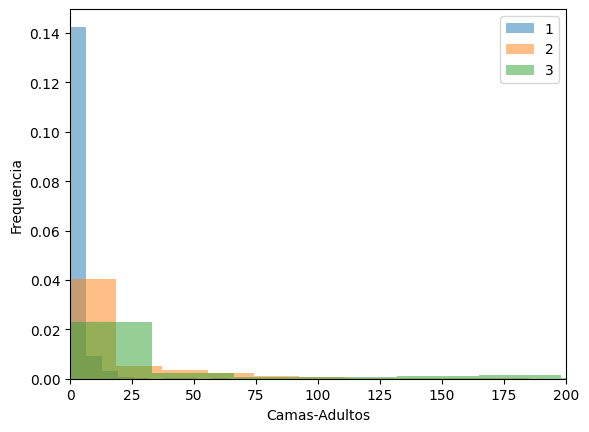

In [7]:
fig, ax = plt.subplots()

variable = 'Camas-Adultos'

# Iterate over categories and plot histograms
for category in [1, 2, 3]:
    data = df_publicas[df_publicas['num nivel atencion'] == category]
    ax.hist(
        data[variable], 
        label=category,
        alpha=0.5,
        # bins=25,
        density=True
        
        )

# Add labels and legend
ax.set_xlabel(variable)
ax.set_ylabel('Frequencia')

ax.set_xlim(0, 200)
# ax.set_ylim(0, 1)
ax.legend()

# Show the plot
plt.show()

## Consultorios-Consulta Externa

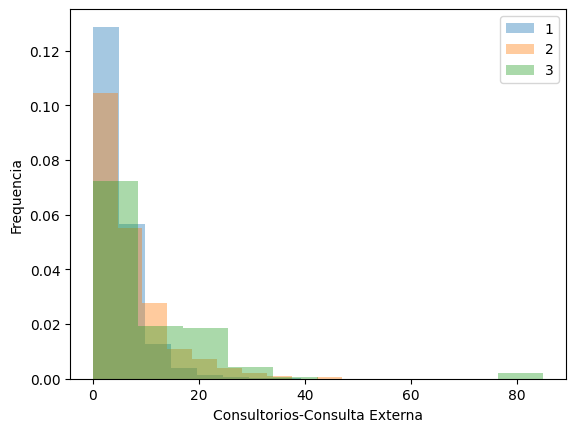

In [8]:
fig, ax = plt.subplots()

variable = 'Consultorios-Consulta Externa'

# Iterate over categories and plot histograms
for category in [1, 2, 3]:
    data = df_publicas[df_publicas['num nivel atencion'] == category]
    ax.hist(
        data[variable], 
        label=category,
        alpha=0.4,
        # bins=25,
        density=True
        
        )

# Add labels and legend
ax.set_xlabel(variable)
ax.set_ylabel('Frequencia')

# ax.set_xlim(0, 40)
# ax.set_ylim(0, 300)
ax.legend()

# Show the plot
plt.show()

## Salas-Sala de Cirugía

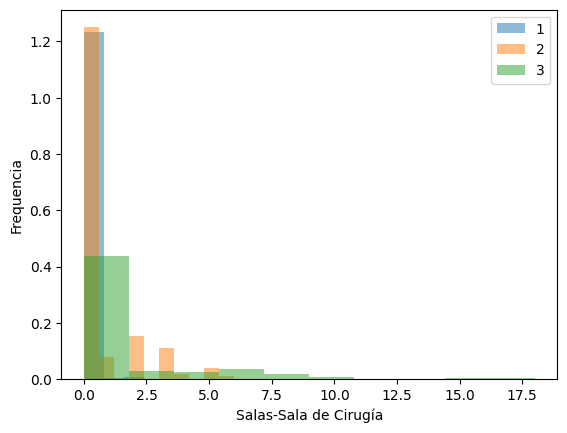

In [ ]:
fig, ax = plt.subplots()

variable = 'Salas-Sala de Cirugía'

# Iterate over categories and plot histograms
for category in [1, 2, 3]:
    data = df_publicas[df_publicas['num nivel atencion'] == category]
    ax.hist(
        data[variable], 
        label=category,
        alpha=0.5,
        # bins=10,
        density=True,
        
        )

# Add labels and legend
ax.set_xlabel(variable)
ax.set_ylabel('Frequencia')

# ax.set_xlim(0, 6)
# ax.set_ylim(0, 800)
ax.legend()

# Show the plot
plt.show()

## Ambulancias-Básica

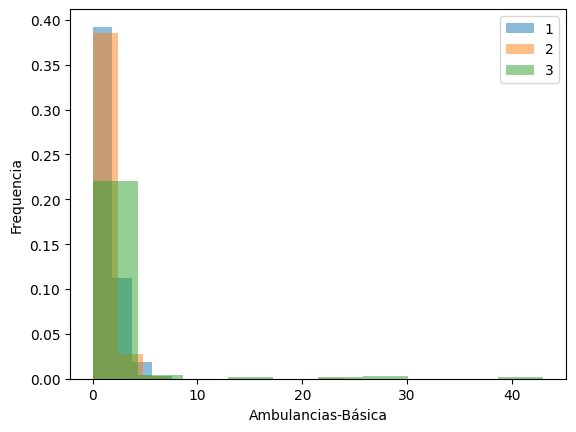

In [9]:
fig, ax = plt.subplots()

variable = 'Ambulancias-Básica'

# Iterate over categories and plot histograms
for category in [1, 2, 3]:
    data = df_publicas[df_publicas['num nivel atencion'] == category]
    ax.hist(
        data[variable], 
        label=category,
        alpha=0.5,
        # bins=25,
        density=True,
        
        )

# Add labels and legend
ax.set_xlabel(variable)
ax.set_ylabel('Frequencia')

# ax.set_xlim(0, 6)
# ax.set_ylim(0, 800)
ax.legend()

# Show the plot
plt.show()

## Salas-Procedimientos

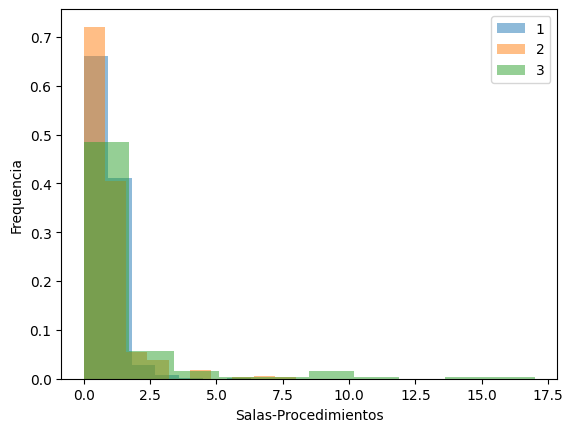

In [9]:
fig, ax = plt.subplots()

variable = 'Salas-Procedimientos'

# Iterate over categories and plot histograms
for category in [1, 2, 3]:
    data = df_publicas[df_publicas['num nivel atencion'] == category]
    ax.hist(
        data[variable], 
        label=category,
        alpha=0.5,
        # bins=10,
        density=True,
        
        )

# Add labels and legend
ax.set_xlabel(variable)
ax.set_ylabel('Frequencia')

# ax.set_xlim(0, 6)
# ax.set_ylim(0, 800)
ax.legend()

# Show the plot
plt.show()

## Camillas-Observación Pediátrica

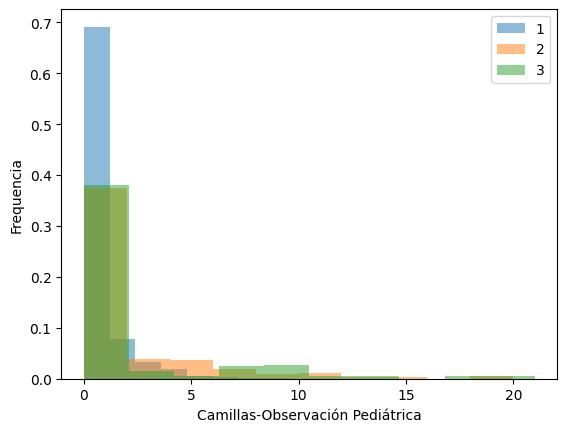

In [10]:
fig, ax = plt.subplots()

variable = 'Camillas-Observación Pediátrica'

# Iterate over categories and plot histograms
for category in [1, 2, 3]:
    data = df_publicas[df_publicas['num nivel atencion'] == category]
    ax.hist(
        data[variable], 
        label=category,
        alpha=0.5,
        # bins=10,
        density=True,
        
        )

# Add labels and legend
ax.set_xlabel(variable)
ax.set_ylabel('Frequencia')

# ax.set_xlim(0, 6)
# ax.set_ylim(0, 800)
ax.legend()

# Show the plot
plt.show()

## Camas-Salud Mental Adulto

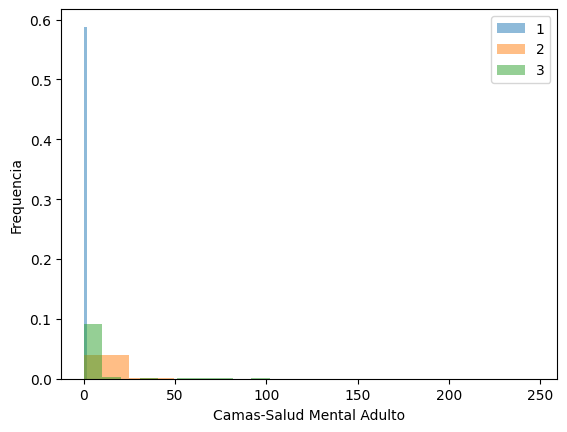

In [11]:
fig, ax = plt.subplots()

variable = 'Camas-Salud Mental Adulto'

# Iterate over categories and plot histograms
for category in [1, 2, 3]:
    data = df_publicas[df_publicas['num nivel atencion'] == category]
    ax.hist(
        data[variable], 
        label=category,
        alpha=0.5,
        # bins=10,
        density=True,
        
        )

# Add labels and legend
ax.set_xlabel(variable)
ax.set_ylabel('Frequencia')

# ax.set_xlim(0, 6)
# ax.set_ylim(0, 800)
ax.legend()

# Show the plot
plt.show()

## Unidad movil-Unidad Móvil

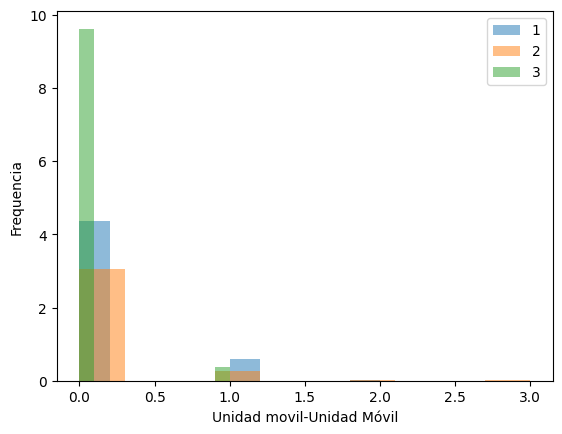

In [12]:
fig, ax = plt.subplots()

variable = 'Unidad movil-Unidad Móvil'

# Iterate over categories and plot histograms
for category in [1, 2, 3]:
    data = df_publicas[df_publicas['num nivel atencion'] == category]
    ax.hist(
        data[variable], 
        label=category,
        alpha=0.5,
        # bins=10,
        density=True,
        
        )

# Add labels and legend
ax.set_xlabel(variable)
ax.set_ylabel('Frequencia')

# ax.set_xlim(0, 6)
# ax.set_ylim(0, 800)
ax.legend()

# Show the plot
plt.show()

## Camas-Pediátrica

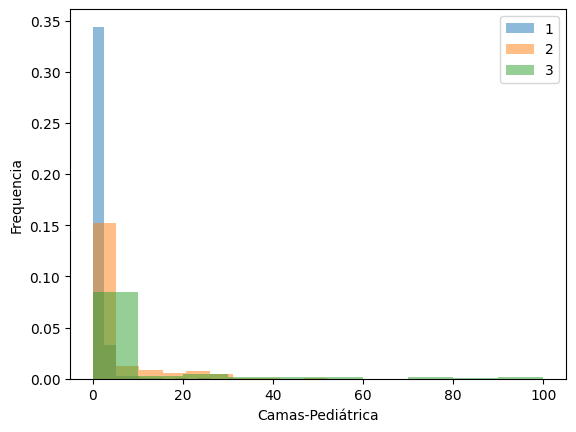

In [13]:
fig, ax = plt.subplots()

variable = 'Camas-Pediátrica'

# Iterate over categories and plot histograms
for category in [1, 2, 3]:
    data = df_publicas[df_publicas['num nivel atencion'] == category]
    ax.hist(
        data[variable], 
        label=category,
        alpha=0.5,
        # bins=10,
        density=True,
        
        )

# Add labels and legend
ax.set_xlabel(variable)
ax.set_ylabel('Frequencia')

# ax.set_xlim(0, 6)
# ax.set_ylim(0, 800)
ax.legend()

# Show the plot
plt.show()

## Consultorios-Urgencias

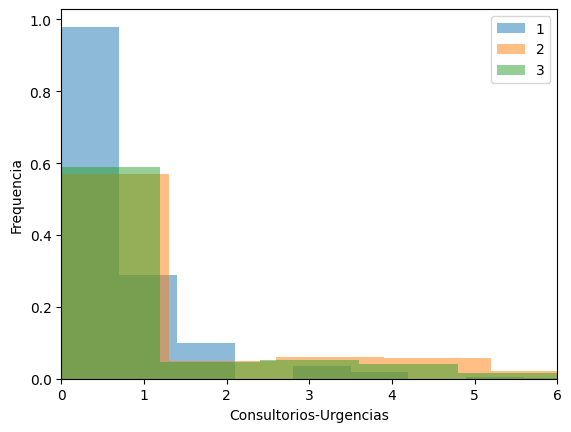

In [10]:
fig, ax = plt.subplots()

variable = 'Consultorios-Urgencias'

# Iterate over categories and plot histograms
for category in [1, 2, 3]:
    data = df_publicas[df_publicas['num nivel atencion'] == category]
    ax.hist(
        data[variable], 
        label=category,
        alpha=0.5,
        bins=10,
        density=True,
        
        )

# Add labels and legend
ax.set_xlabel(variable)
ax.set_ylabel('Frequencia')

ax.set_xlim(0, 6)
# ax.set_ylim(0, 800)
ax.legend()

# Show the plot
plt.show()